In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-bollywood-actors/agedetectiontest/test.csv
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/25540.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/20529.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/10304.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/10730.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/22608.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/7737.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/10054.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/3919.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/6197.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/10924.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/21494.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/24752.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test/25184.jpg
/kaggle/input/face-bollywood-actors/agedetectiontest/Test

In [2]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 


2025-07-14 11:28:57.246441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752492537.496226      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752492537.574449      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train=pd.read_csv("/kaggle/input/face-bollywood-actors/agedetectiontrain/train.csv")

In [4]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
test=pd.read_csv("/kaggle/input/face-bollywood-actors/agedetectiontest/test.csv")

In [6]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


Age group: MIDDLE


/tmp/ipykernel_13/1730192116.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join("/kaggle/input/face-bollywood-actors/agedetectiontrain/Train", img_name))


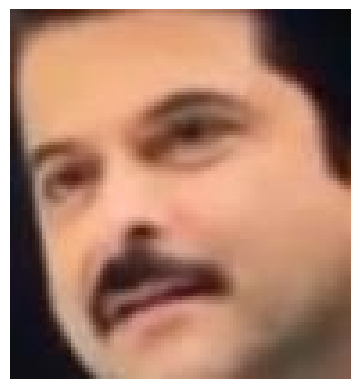

In [7]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join("/kaggle/input/face-bollywood-actors/agedetectiontrain/Train", img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()


In [8]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('/kaggle/input/face-bollywood-actors/agedetectiontrain/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)


/tmp/ipykernel_13/1031779917.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [9]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('/kaggle/input/face-bollywood-actors/agedetectiontest/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
test_x = np.stack(temp)


/tmp/ipykernel_13/419540370.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [10]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.


In [11]:
# Encoding the categorical variable to numeric
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels to integers
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)

# Convert integer labels to one-hot encoded vectors
train_y = to_categorical(train_y)


In [12]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128


In [13]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-07-14 11:31:07.117415: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
# Printing model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5593 - loss: 0.9136
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6017 - loss: 0.8495
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6150 - loss: 0.8344
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6165 - loss: 0.8173
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6273 - loss: 0.8109


In [17]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6288 - loss: 0.8068 - val_accuracy: 0.6273 - val_loss: 0.8275
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6337 - loss: 0.7988 - val_accuracy: 0.6376 - val_loss: 0.8095
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6402 - loss: 0.7845 - val_accuracy: 0.6042 - val_loss: 0.8301
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6447 - loss: 0.7818 - val_accuracy: 0.6474 - val_loss: 0.7731
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6433 - loss: 0.7824 - val_accuracy: 0.6489 - val_loss: 0.7712


In [18]:
# Predicting and importing the result in a csv file
import numpy as np

# Get prediction probabilities for test data
pred_probs = model.predict(test_x)

# Convert probabilities to class indices
pred_indices = np.argmax(pred_probs, axis=1)

# Map class indices back to original labels
pred = lb.inverse_transform(pred_indices)

# Assign predictions to your DataFrame
test['Class'] = pred

# Save to CSV
test.to_csv('out.csv', index=False)

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


  1/208 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step

/tmp/ipykernel_13/2833720892.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/kaggle/input/face-bollywood-actors/agedetectiontest/Test', img_name))


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


ValueError: y contains previously unseen labels: [0.03184833 0.4700578  0.49809387]

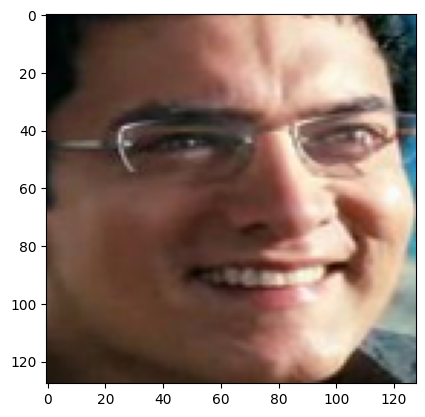

In [19]:
# Visual Inspection of predictions
idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('/kaggle/input/face-bollywood-actors/agedetectiontest/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = model.predict(test_x)
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform(pred[idx]))
